# Predicting the Cost of Natural Disasters 

By Mike Stegmuller

## The main problem I am exploring is how much natural disasters cost.  I am trying to predict the cost of the next natural disaster.  The metrics I am using to make my predictions are type of disaster, number of days a disaster lasts, number of deaths, and inflation rate.  

### Importing libraries and data 

In [1]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
from sklearn.preprocessing import StandardScaler
import warnings 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import graphviz
from graphviz import Digraph

import graphviz as gr

from sklearn import datasets
from sklearn import svm

In [2]:
df = pd.read_csv('df' , index_col=0)
df.head()

,Total CPI-Adjusted Cost (Millions of Dollars)_x,Deaths,number_of_days,Inflation rate value,Drought,Flooding,Freeze,Severe Storm,Tropical Cyclone,Wildfire,Winter Storm
0,2678.6,7,7,82383.333333,0,1,0,0,0,0,0
1,2177.2,13,4,82383.333333,0,0,0,0,1,0,0
2,39579.0,1260,182,82383.333333,1,0,0,0,0,0,0
3,2019.2,0,2,90933.333333,0,0,1,0,0,0,0
4,1372.9,20,5,90933.333333,0,0,0,1,0,0,0


# Linear regression model 

In [3]:
X = df.drop('Total CPI-Adjusted Cost (Millions of Dollars)_x', axis = 'columns')

In [4]:
y = df[['Total CPI-Adjusted Cost (Millions of Dollars)_x']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
scaleStandard = StandardScaler()

In [7]:
scaleStandard.fit_transform(X_test)

array([[ 1.43351327e-01, -3.75024675e-01,  7.65556902e-01,
        -2.61116484e-01, -4.35744670e-01, -1.81568260e-01,
         1.04349839e+00, -3.82546028e-01, -2.10818511e-01,
        -3.25395687e-01],
       [-5.88986972e-01, -3.75024675e-01,  1.47223498e+00,
        -2.61116484e-01, -4.35744670e-01, -1.81568260e-01,
         1.04349839e+00, -3.82546028e-01, -2.10818511e-01,
        -3.25395687e-01],
       [-5.01106376e-01, -3.61189385e-01,  6.39608657e-01,
        -2.61116484e-01, -4.35744670e-01, -1.81568260e-01,
         1.04349839e+00, -3.82546028e-01, -2.10818511e-01,
        -3.25395687e-01],
       [-5.01106376e-01, -3.75024675e-01,  1.03008715e-01,
        -2.61116484e-01, -4.35744670e-01, -1.81568260e-01,
        -9.58314847e-01, -3.82546028e-01, -2.10818511e-01,
         3.07318149e+00],
       [ 2.69188861e+00, -3.75024675e-01,  5.71550665e-02,
        -2.61116484e-01, -4.35744670e-01, -1.81568260e-01,
        -9.58314847e-01,  2.61406452e+00, -2.10818511e-01,
        -3.

In [8]:
rModel = linear_model.LinearRegression()

In [9]:
rModel.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = rModel.predict(X_test)

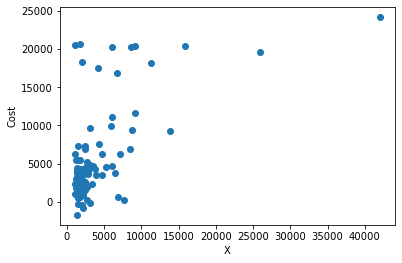

In [11]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('X')
_ = plt.ylabel('Cost')

In [12]:
X = sm.add_constant(X)

In [13]:
model3 = sm.OLS(y_train, X_train)

In [14]:
rModel3 = model3.fit()

In [15]:
y_pred = rModel3.predict(X_test)

Text(0, 0.5, 'Predicted cost')

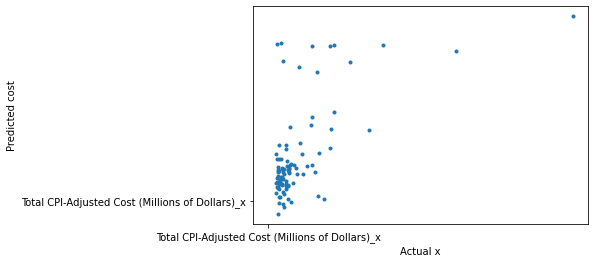

In [16]:
plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation
test_range = [min(y_test), max(y_test)]
plt.plot(test_range, test_range)

# Label it nicely
plt.xlabel('Actual x')
plt.ylabel('Predicted cost')

In [17]:
model4 = sm.OLS(y_train, X_train)
# Fit the model
rModel4 = model4.fit()
# Evaluate the model
rModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     Total CPI-Adjusted Cost (Millions of Dollars)_x   R-squared:                       0.460
Model:                                                         OLS   Adj. R-squared:                  0.442
Method:                                              Least Squares   F-statistic:                     25.71
Date:                                             Fri, 12 Jul 2024   Prob (F-statistic):           7.88e-32
Time:                                                     09:16:05   Log-Likelihood:                -3107.6
No. Observations:                                              282   AIC:                             6235.
Df Residuals:                                                  272   BIC:                             6272.
Df Model:                                                        9                                         
Covariance Type:                                         nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Deaths                  48.2928      4.027     11.993      0.000      40.366      56.220
number_of_days          34.8117     22.880      1.521      0.129     -10.234      79.857
Inflation rate value     0.0298      0.018      1.694      0.091      -0.005       0.064
Drought              -9798.6143   6409.898     -1.529      0.128   -2.24e+04    2820.705
Flooding             -2856.5351   4698.865     -0.608      0.544   -1.21e+04    6394.232
Freeze               -1605.0466   6697.174     -0.240      0.811   -1.48e+04    1.16e+04
Severe Storm         -5019.8644   4248.460     -1.182      0.238   -1.34e+04    3344.181
Tropical Cyclone      1.228e+04   4249.151      2.890      0.004    3912.782    2.06e+04
Wildfire             -5931.2485   5887.695     -1.007      0.315   -1.75e+04    5659.998
Winter Storm         -3707.6077   5373.070     -0.690      0.491   -1.43e+04    6870.482
==============================================================================
Omnibus:                      294.893   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12206.127
Skew:                           4.305   Prob(JB):                         0.00
Kurtosis:                      34.059   Cond. No.                     2.56e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Scoring the Linear Regression Model 

Model Scoring

In [18]:
rModel.score(X_test, y_test)

-0.0050538791323864185

In [19]:
rModel.score(X_train, y_train)

0.459703896647058

The models predictive accuracy is only at 45%, a high chance of a wrong prediction.  

The cross validation score, which evaluates and scores on 20 versions of the data.  There is one instance where .599 or .6 rounded up.  Better but not good. 

In [20]:
cross_val_score(rModel, X, y, cv = 20)

array([  0.23164305,   0.15246049,   0.07411878, -13.3960242 ,
        -3.99577765,  -0.04915003,   0.59935819,   0.48071245,
         0.5207187 ,  -0.39956171,   0.39568882,  -1.86920539,
        -0.20781033,  -0.04042896,   0.55934587,  -0.21373955,
        -0.96256584,   0.28572733,   0.26404407,  -3.13456518])

In [21]:
rModel_score = rModel.score(X_test, y_test)

In [22]:
rModel_cross_val_score = (cross_val_score(rModel, X, y, cv = 20))

In [23]:
rModel_score, rModel_cross_val_score

(-0.0050538791323864185,
 array([  0.23164305,   0.15246049,   0.07411878, -13.3960242 ,
         -3.99577765,  -0.04915003,   0.59935819,   0.48071245,
          0.5207187 ,  -0.39956171,   0.39568882,  -1.86920539,
         -0.20781033,  -0.04042896,   0.55934587,  -0.21373955,
         -0.96256584,   0.28572733,   0.26404407,  -3.13456518]))

In [24]:
cross_val_score(rModel, X, y, cv = 20).min()

-13.396024201928782

In [25]:
rModel_cross_val_score_min = (cross_val_score(rModel, X, y, cv = 20)).min()

In [26]:
cross_val_score(rModel, X, y, cv = 20).max()

0.5993581888771102

In [27]:
rModel_cross_val_score_max = (cross_val_score(rModel, X, y, cv = 20)).max()

In [28]:
rModel_cross_val_score_mean = (cross_val_score(rModel, X, y, cv = 20)).mean()

The cross validation score shows that we can get better a prediction than just the model score, however 60% is still low.

I had an idea that maybe the linear regression model would be better suited if I removed the highest and lowest cross validation scores.  I tried a MinMax scaler to see if it made any difference. 

MaxMin scaler

In [29]:
from sklearn.preprocessing import MinMaxScaler


In [30]:
Mmscaler = MinMaxScaler()

In [31]:
Mmscaler.fit_transform(X,y)

array([[0.        , 0.00234821, 0.01917808, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00436095, 0.0109589 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.42267695, 0.49863014, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.00273973, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0828581 , 0.49863014, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00167729, 0.00547945, ..., 0.        , 0.        ,
        0.        ]])

In [32]:
print(X)

     const  Deaths  number_of_days  Inflation rate value  Drought  Flooding  \
0      1.0       7               7          82383.333333        0         1   
1      1.0      13               4          82383.333333        0         0   
2      1.0    1260             182          82383.333333        1         0   
3      1.0       0               2          90933.333333        0         0   
4      1.0      20               5          90933.333333        0         0   
..     ...     ...             ...                   ...      ...       ...   
371    1.0       0               0         302340.833333        0         0   
372    1.0       5               2         302340.833333        0         0   
373    1.0       0               1         302340.833333        0         0   
374    1.0     247             182         302340.833333        1         0   
375    1.0       5               2         302340.833333        0         1   

     Freeze  Severe Storm  Tropical Cyclone  Wildfi

In [33]:
print(X_train)

     Deaths  number_of_days  Inflation rate value  Drought  Flooding  Freeze  \
278       0               6         255651.666667        0         0       0   
60        0               0         152383.333333        0         0       0   
119    1833               5         195266.666667        0         0       0   
266       0               1         251099.500000        0         0       0   
352      33               1         302340.833333        0         0       0   
..      ...             ...                   ...      ...       ...     ...   
71       36              10         160525.000000        0         1       0   
106       7               5         184000.000000        0         0       0   
270      53               3         251099.500000        0         0       0   
348      22              83         292612.500000        0         1       0   
102      21              90         179866.666667        0         0       0   

     Severe Storm  Tropical Cyclone  Wi

In [34]:
rModel2 = linear_model.LinearRegression()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
rModel2.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = rModel2.predict(X_test)

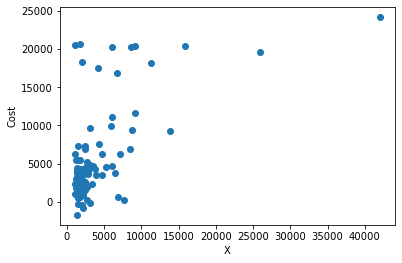

In [38]:
# Let's plot the predictions against the actual result. Use scatter()
_ = plt.scatter(y_test, y_pred)
_ = plt.xlabel('X')
_ = plt.ylabel('Cost')

In [39]:
rModel2.score(X_train, y_train)

0.45970389664705813

In [40]:
cross_val_score(rModel2, X, y, cv = 20)

array([  0.23164305,   0.15246049,   0.07411878, -13.3960242 ,
        -3.99577765,  -0.04915003,   0.59935819,   0.48071245,
         0.5207187 ,  -0.39956171,   0.39568882,  -1.86920539,
        -0.20781033,  -0.04042896,   0.55934587,  -0.21373955,
        -0.96256584,   0.28572733,   0.26404407,  -3.13456518])


Unfortunately, there was little to no difference.


## The next machine learning model I decided to try was a Decision tree model

# Decision Tree Regressor

In [41]:
X = df.drop('Total CPI-Adjusted Cost (Millions of Dollars)_x', axis = 'columns')
y = df[['Total CPI-Adjusted Cost (Millions of Dollars)_x']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
rg = DecisionTreeRegressor(max_depth =4, min_samples_leaf= 0.1, random_state=3)

In [44]:
rg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [45]:
y_predict = rg.predict(X_test)

In [46]:
y_predict

array([ 3820.91290323,  2259.38627451,  2259.38627451,  2259.38627451,
       39533.71666667,  2259.38627451,  2259.38627451,  3820.91290323,
        2259.38627451,  2259.38627451,  2259.38627451,  2259.38627451,
        3820.91290323,  2259.38627451,  2259.38627451,  3820.91290323,
        2259.38627451,  5446.8       ,  2259.38627451,  2259.38627451,
        2259.38627451,  2259.38627451,  2259.38627451,  2259.38627451,
        5446.8       ,  2259.38627451,  2259.38627451,  2259.38627451,
       13853.69677419,  2259.38627451,  2259.38627451,  5446.8       ,
        2259.38627451,  2259.38627451,  2259.38627451,  5446.8       ,
        3820.91290323, 13853.69677419,  3820.91290323,  2259.38627451,
        2259.38627451, 13853.69677419,  3820.91290323,  2259.38627451,
        3820.91290323,  2259.38627451,  5446.8       ,  2259.38627451,
        3820.91290323, 13853.69677419,  2259.38627451, 39533.71666667,
        2259.38627451, 39533.71666667,  2259.38627451,  2259.38627451,
      

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict)

4107.151638809265

In [48]:
y_predict_train = rg.predict(X_train)
mean_absolute_error(y_train, y_predict_train)

6289.154405372307

In [49]:
y_predict_train

array([ 2259.38627451,  2259.38627451, 39533.71666667,  2259.38627451,
       13853.69677419,  2259.38627451,  2259.38627451,  2259.38627451,
        2259.38627451, 39533.71666667,  2259.38627451,  2259.38627451,
        3820.91290323,  3820.91290323,  3820.91290323,  2259.38627451,
        5446.8       ,  2259.38627451,  2259.38627451,  5446.8       ,
       39533.71666667,  2259.38627451,  5446.8       ,  2259.38627451,
        2259.38627451,  2259.38627451,  3820.91290323, 39533.71666667,
       13853.69677419,  2259.38627451,  5446.8       ,  3820.91290323,
        2259.38627451,  2259.38627451,  2259.38627451,  5446.8       ,
        3820.91290323, 13853.69677419, 39533.71666667,  5446.8       ,
        2259.38627451,  2259.38627451, 13853.69677419,  2259.38627451,
        2259.38627451,  3820.91290323,  5446.8       ,  5446.8       ,
       39533.71666667,  2259.38627451,  2259.38627451,  2259.38627451,
       39533.71666667,  2259.38627451,  2259.38627451, 13853.69677419,
      

In [50]:
y_train

,Total CPI-Adjusted Cost (Millions of Dollars)_x
278,1816.8
60,1161.5
119,195046.1
266,2712.1
352,5740.4
...,...
71,5822.8
106,1433.0
270,29280.0
348,4635.0


In [51]:
mse_rg = MSE(y_test, y_pred)

In [52]:
rmse_rg = mse_rg**(1/2)

In [53]:
print(rmse_rg)

5364.951206518638


In [54]:
mse_rg

28782701.448325787

In [55]:
rg.score(X_train, y_train)

0.32213003694857156

In [56]:
rg_score = rg.score(X_train, y_train)

In [57]:
rg.score(X_test, y_test)

-1.9959332405320507

In [58]:
cross_val_score(rg, X, y, cv = 20)

array([ -2.82965081,  -0.51413979,   0.02817844, -18.04456289,
       -13.39678556,   0.48540444,   0.18258358,   0.75741558,
        -4.04311441,  -0.12218434,   0.59832959,  -3.09917789,
         0.36718933,   0.18325334,   0.62109513,   0.37509722,
         0.73222519,   0.36677276,   0.34704186,  -6.85437392])

In [59]:
rg_cross_val_score = cross_val_score(rg, X, y, cv = 20)

In [60]:
cross_val_score(rg, X, y, cv = 20).mean()

-2.1929701573469

In [61]:
rg_cross_val_score_mean = cross_val_score(rg, X, y, cv = 20).mean()

In [62]:
cross_val_score(rg, X, y, cv = 20).max()

0.7574155777983903

In [63]:
rg_cross_val_score_max = cross_val_score(rg, X, y, cv = 20).max()

In [64]:
rg_cross_val_score_min = cross_val_score(rg, X, y, cv = 20).min()

The decision tree regressor had better scores than the linear regression in the cross value scores.  In this model you get more scores over 60%.  Much better than the linear regression.   

## The next model I tried was Random Forest 

# Random Forest 

In [65]:
X = df.drop('Total CPI-Adjusted Cost (Millions of Dollars)_x', axis = 'columns')
y = df[['Total CPI-Adjusted Cost (Millions of Dollars)_x']]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

In [69]:
rfr.predict(X_test)

array([ 2237.345     ,  2439.65985   ,  3399.35409524,  3002.616     ,
       61228.726     ,  2967.312     ,  2607.695     ,  3697.475     ,
        1347.23      ,  1910.594     ,  2519.468     ,  2332.80033333,
        4713.143     ,  2095.444     ,  2006.09016667,  3493.582     ,
        1675.85171429,  2968.158     ,  1792.01975   ,  3903.887     ,
        2746.056     ,  2301.97391667,  2007.33      ,  4228.86      ,
        4086.41      ,  4294.906     ,  2563.036     ,  2131.95046667,
       25366.7       ,  1823.555     ,  2593.75096667,  5286.284     ,
        2152.899     ,  1713.6949    ,  1791.80233333,  4839.236     ,
        5389.388     , 23581.889     ,  4269.169     ,  3216.46525   ,
        2593.75096667, 13187.485     ,  3894.187     ,  3593.95675   ,
        3815.641     ,  1599.74896667,  5511.214     ,  3102.36      ,
        8669.397     , 16848.368     ,  2022.1634    , 18345.417     ,
        2924.94933333,  5877.187     ,  2771.322     ,  3128.454     ,
      

In [70]:
y_preds = rfr.predict(X_test)

In [71]:
print("Regression model metrics of test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics of test set
R^2: 0.3184588198995012
MAE: 2589.6936948074976
MSE: 19517954.92646294


In [72]:
rfr.score(X_train, y_train)

0.9303378570432113

In [73]:
rfr_score = rfr.score(X_train, y_train)

In [74]:
cross_val_score(rfr, X, np.ravel(y), cv = 20)

array([-0.36004558, -0.62868271,  0.05718315, -2.82438722, -2.15445716,
        0.51793274,  0.52289172,  0.42873085,  0.58190894,  0.93144523,
        0.80997654,  0.32042333, -1.09135326,  0.49731427,  0.83523481,
        0.74957358,  0.50803745,  0.91546891,  0.87406661, -0.46601576])

In [75]:
rfr_cross_val_score = cross_val_score(rfr, X, np.ravel(y), cv = 20)

In [76]:
cross_val_score(rfr, X, np.ravel(y), cv = 20).mean()

0.09705735237856063

In [77]:
rfr_cross_val_score_mean = cross_val_score(rfr, X, np.ravel(y), cv = 20).mean()

In [78]:
cross_val_score(rfr, X, np.ravel(y), cv = 20).min()

-2.683762195121924

In [79]:
rfr_cross_val_score_min = cross_val_score(rfr, X, np.ravel(y), cv = 20).min()

In [80]:
cross_val_score(rfr, X, np.ravel(y), cv = 20).max()

0.9183221762880142

In [81]:
rfr_cross_val_score_max = cross_val_score(rfr, X, np.ravel(y), cv = 20).max()

I believe that the random forest regressor is the best preforming model for predicting the future costs of natural disaster based on the parameters provided.  The score is at 93% predictive accuracy and the cross validation scores have multiple scores above 70%.  

# Comparing the models

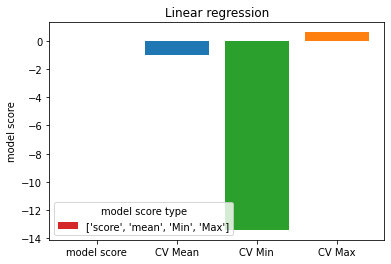

In [82]:
fig, ax = plt.subplots()

model_scores = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [rModel_score, rModel_cross_val_score_mean, rModel_cross_val_score_min, rModel_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']


ax.bar(model_scores, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Linear regression')
ax.legend(title='model score type')

plt.show()

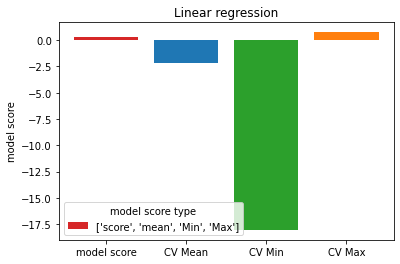

In [83]:
fig, ax = plt.subplots()

fruits = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [rg_score, rg_cross_val_score_mean, rg_cross_val_score_min, rg_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Linear regression')
ax.legend(title='model score type')

plt.show()

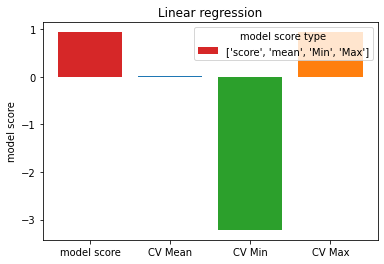

In [84]:
fig, ax = plt.subplots()

fruits = ['model score', 'CV Mean', 'CV Min', 'CV Max']
counts = [rfr_score, rfr_cross_val_score_mean, rfr_cross_val_score_min, rfr_cross_val_score_max]
bar_labels = ['score', 'mean', 'Min', 'Max']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('model score')
ax.set_title('Linear regression')
ax.legend(title='model score type')

plt.show()

In [85]:
myLabels = [ 'Linear Regression','Decision Tree','Random Forest']
model_score= [  rModel_score,rg_score, rfr_score]
cross_val_score_mean = [ rModel_cross_val_score_mean, rg_cross_val_score_mean, rfr_cross_val_score_mean]
cross_val_score_min = [ rModel_cross_val_score_min, rg_cross_val_score_min, rfr_cross_val_score_min]
cross_val_score_max = [ rModel_cross_val_score_max, rg_cross_val_score_mean, rfr_cross_val_score_max]


score_tab_acc = pd.DataFrame(list(zip(myLabels, model_score)), 
               columns =['ML Model', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, cross_val_score_mean, cross_val_score_min, cross_val_score_max)), 
               columns =['ML Model', 'Mean', 'Min', 'Max' ]) 
print(score_tab_acc)

score_tab



            ML Model  Model accuracy score
0  Linear Regression             -0.005054
1      Decision Tree              0.322130
2      Random Forest              0.930338


,ML Model,Mean,Min,Max
0,Linear Regression,-1.035251,-13.396024,0.599358
1,Decision Tree,-2.192970,-18.044563,-2.192970
2,Random Forest,0.010800,-3.218166,0.933306


###  In conclusion, the Random Forest Model is the best model to predict the cost of the next disaster because it combines multiple decision trees into a single model. It uses 100 decision tree models to make final predictions based on the average of the individual trees. In this model the overall score is .92 which is great for predictive accuracy. In the cross value score, there were multiple scores over 70%, another good sign. In the bar graph the mean, min and max bars are all very close to 1. The random forest algorithm is great for predicting future behavior